F-DISTRIBUTION

## F- DISTRIBUTION

The F probability distribution has two parameters, denoted by $\mu_1$ and $\mu_2$. The parameter $\mu_1$ is called the number of numerator degrees of freedom, and $\mu_2$ is the number of
denominator degrees of freedom; here $\mu_1$ and $\mu_2$ are positive integers.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html

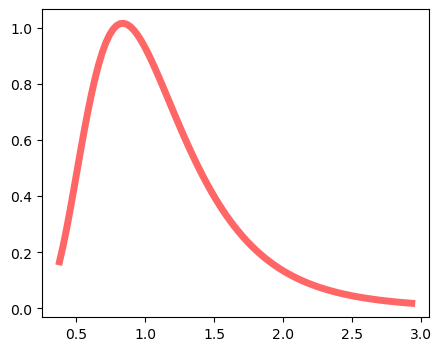

In [7]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(5,4))

dfn, dfd = 29, 18

x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

## F- TEST FOR EQUALITY OF VARIANCE

Two populations with normal distributions having variance $(\sigma_1)^2$ and $(\sigma_2)^2$. 

AIM: Using samples we need to check $H_0 : (\sigma_1)^2 = (\sigma_2)^2$

SAMPLES: 
- Sample 1 
    - Size = m
    - Variance = $(s_1)^2$


- Sample 2 
    - Size = n
    - Variance = $(s_2)^2$
    


THE TEST

$H_0 : (\sigma_1)^2 = (\sigma_2)^2$

Test : F test

Test statistics : $f = \frac{{s_1}^2}{{s_2}^2}$  

Significance level $\alpha$

##### Alternate Hypothesis and Rejection Region
$H_1:  {\sigma_1}^2 > {\sigma_2}^2 $        Region $f \geq F_{\alpha, m-1,n-1}$ 

$H_1:  {\sigma_1}^2 < {\sigma_2}^2 $        Region $f \leq F_{\alpha, m-1,n-1}$

$H_1:  {\sigma_1}^2 \neq {\sigma_2}^2 $        Region $f \geq F_{\frac{\alpha}{2}, m-1,n-1}$ OR $f \leq F_{1-\frac{\alpha}{2}, m-1,n-1}$ 

#### QUESTION

On the basis of data reported in the article “Serum Ferritin in an Elderly Population”
(J. of Gerontology, 1979: 521–524), the authors concluded that the ferritin
distribution in the elderly had a smaller variance than in the younger adults. (Serum
ferritin is used in diagnosing iron deficiency.) For a sample of 28 elderly men, the
sample standard deviation of serum ferritin (mg/L) was $s_1 = 52.6$; for 26 young
men, the sample standard deviation was $S_2=84.2$ . Does this data support the
conclusion as applied to men? (Significance level 0.01)

#### ANSWER 

Sample 1 
- Ferrin distribution in elderly men
- Sample size m = 28
- Standard deviation $s_1 = 52.6$

Sample 2
- Ferrin distribution in younger adults
- Sample size n = 26
- Standard deviation $s_2 = 84.2$

$H_0: {\sigma_1}^2 = {\sigma_2}^2$

$H_a: {\sigma_1}^2 < {\sigma_2}^2$

- We need left hand test with significance level 0.01

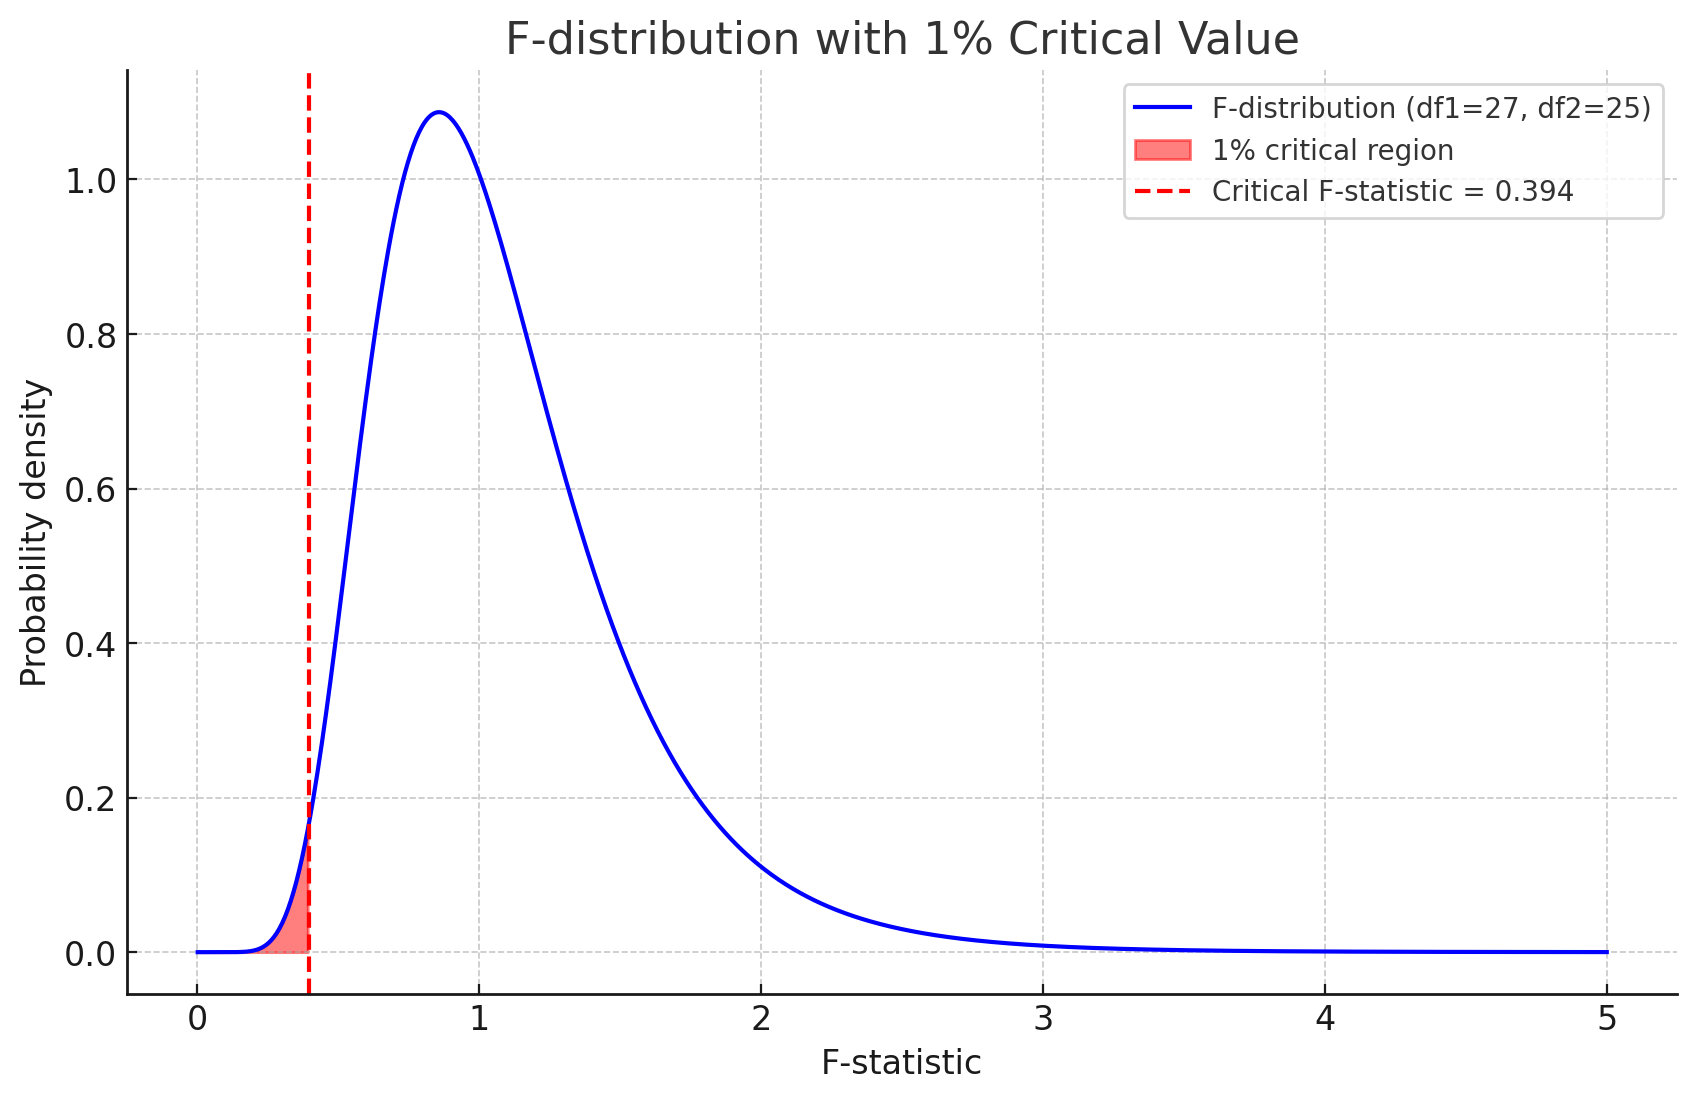

In [10]:
from scipy.stats import f

m = 28
n = 26

s_1 = 52.6
s_2 = 84.2

# Test statistic 
f_stat = s_1**2 / s_2**2

# Alpha
alpha = 0.01

# F value 

F_critical = f.ppf(alpha, m-1, n-1)   # This give critical value with corresponding significance level from left

print("Test Statistic", f_stat)
print("Critical value", F_critical )

if f_stat <= F_critical:
    print("Reject Null Hypothesis")
else:
    print("No evodence to reject Null HYpothesis")

Test Statistic 0.39025394801428565
Critical value 0.39431831697977626
Reject Null Hypothesis


H_0 is rejected at level 0.01 in favor of Ha, so variability does appear to
be greater in young men than in elderly men

In [16]:
#Using p value
p_value = f.cdf(f_stat, m-1, n-1)  # Left tail test
print("P value",p_value)

if p_value < alpha :
    print("Reject H_0")
else:
    print("No evidence to reject H_0)")

P value 0.009349977672315796
Reject H_0
